UNIDADE 4

Neste algorítimo iremos aplicar algumas metodologias de calssificação 

Primeiro, extraímos os dados:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score
from sklearn.metrics import roc_curve, auc
caminho_arquivo = r"C:\Users\vini_\OneDrive\Área de Trabalho\ALL CSV FILES - 2nd Edition\Default.csv"

# Lendo apenas as primeiras 10 linhas do arquivo CSV
df = pd.read_csv(caminho_arquivo)

# Exibindo as primeiras 5 linhas do DataFrame
df.head()



,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Quais parâmetros são qualitaívos?

-estudantes

-maus gastadores(Ficaram em débito)

Por quê não usar o modelo de previsão da regressão linear? 
O problema é que se ao usar regressão linear, algumas das nossas estimativas podem 
ficar fora do modelo binários,o que complica a interpretação como probabilidades.
-Ela não consegue prever respostas qualitatívas
-Mesmo com 2 classes(binário), não consegue gerar um modelo de previsão efetívo

4.3 Usando a regressão linear

Coeficiente de Determinação (R²): 0.123
Acurácia: 0.967
AUC-ROC:  0.948
Coeficientes: [0.00012987]
Intercepto: -0.0751919588462226


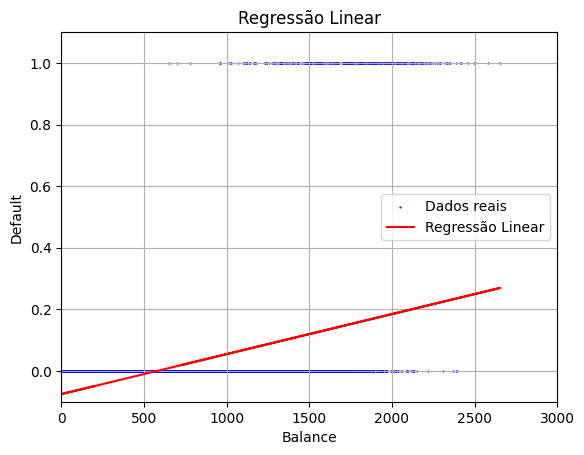

In [12]:
# Definindo o input e o output
X = df[['balance']]
Y = df['default']

# Substituindo o valor de 'default' por 0 e 1 (binário)
Y = Y.replace({'No': 0, 'Yes': 1})

# Objeto da regressão linear
reg = LinearRegression()

# Inserindo os valores de X e Y na regressão linear
reg.fit(X, Y)

# Fazendo a predição
previsoes = reg.predict(X)

# Calculando a acurácia
acuracia = accuracy_score(Y, previsoes.round())
# Calculando o coeficiente de determinação (R²)
r = r2_score(Y, previsoes)

# Imprimindo os resultados
print("Coeficiente de Determinação (R²):", round(r, 3))
print("Acurácia:", round(acuracia, 3))
auc_roc = roc_auc_score(Y, previsoes)
print('AUC-ROC: ', round(auc_roc, 3))

#Coeficientes e intercepto
print("Coeficientes:", reg.coef_)
print("Intercepto:", reg.intercept_)

# Plotando o gráfico
plt.scatter(X, Y, color='blue', label='Dados reais', s=0.3)
plt.plot(X, previsoes, color='red', label='Regressão Linear')
plt.xlabel('Balance')
plt.ylabel('Default')
plt.title('Regressão Linear')
plt.legend()
plt.xlim((-1, 3000))
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()


4.3 Usando a regressão logistica

Os dados possuem multicolinearidade, podemos usar essa regressão

c:\Users\vini_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\vini_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Coeficiente de Determinação (R²): 0.356
Acurácia: 0.955
AUC-ROC:  0.964
Intercepto: [-10.6447104]
Balanço: [[0.00547414]]


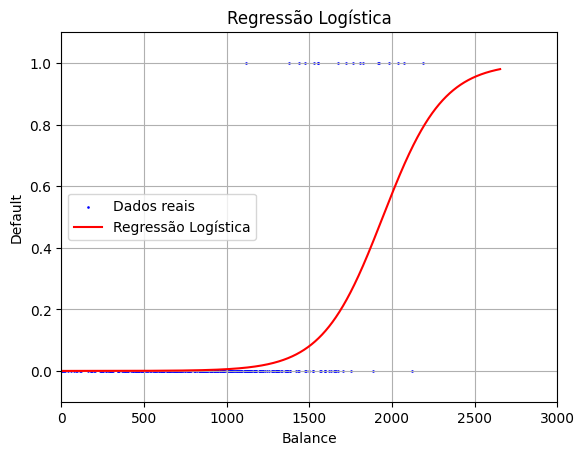

In [25]:
# Definindo o input e o output
X = df[['balance']]
Y = df[['default']]

if not Y.empty:
    # Substituindo o valor de 'default' por 0 e 1 (binário)
    Y = Y.replace({'No': 0, 'Yes': 1})

# Dividindo o dataset em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.03333, random_state=42)

# Objeto da regressão logística
lreg = LogisticRegression()

# Inserindo os valores de X e Y na regressão logística
lreg.fit(X_train, Y_train)

# Fazendo a predição das probabilidades
# Probabilidades de classe positiva
probas_pos = lreg.predict_proba(X_test)[:, 1]

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(Y_test, probas_pos)

# Calculando a acurácia
acuracia = accuracy_score(Y_test, np.round(probas_pos))

# Imprimindo os resultados
print("Coeficiente de Determinação (R²):", round(r2, 3))
print("Acurácia:", round(acuracia, 3))
auc_roc = roc_auc_score(Y_test, probas_pos)
print('AUC-ROC: ', round(auc_roc, 3))


#Intercepto e balanço
β0= lreg.intercept_
β1= lreg.coef_
print("Intercepto:", β0)
print("Balanço:", β1)

# Plotando o gráfico da sigmoide
x_plot = np.linspace(df['balance'].min(), df['balance'].max(), 10000)
probas_plot = lreg.predict_proba(x_plot.reshape(-1, 1))[:, 1]# NÃO SABIA ESSA PESQUISEI NO CHAT GPT
plt.scatter(X_test, Y_test, color='blue', label='Dados reais', s=0.8)
plt.plot(x_plot, probas_plot, color='red', label='Regressão Logística')
plt.xlabel('Balance')
plt.ylabel('Default')
plt.title('Regressão Logística')
plt.legend()
plt.xlim((-1, 3000))
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()


Com os coeficiêntes obtídos, é possível elaborar qualquer previsão

β0 = -10.6447104
β = 0.00547414

Pela fórmula análoga à da regressão
p(X) = e^(β0+β*X) / (1 + e^(β0+βX)


In [14]:
β0 = -10.6447104
β = 0.00547414

#k=float(input('Digite um valor de Balanço para descobrir a probabilidade de falha:\n'))
k = 10000
print(type(k))
p = np.exp((β0 + β * k)) / (1 + np.exp(β0 + β * k))
print('A probabilidade de falha é de:', p)

<class 'int'>
A probabilidade de falha é de: 1.0


4.3 Usando a regressão logistica multipla

In [31]:
# Substituindo o valor de 'default' por 0 e 1 (binário)
df['default'].replace({'Yes': 1, 'No': 0}, inplace=True)
# Substituindo o valor de 'student' por 0 e 1 (binário)
df['student'].replace({'Yes': 1, 'No': 0}, inplace=True)

X = df[['balance', 'student']]
Y = df['default']

# Dividindo o dataset em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.03333, random_state=42)

# Objeto da regressão logística
lreg = LogisticRegression()

# Inserindo os valores de X e Y na regressão logística
lreg.fit(X_train, Y_train)

# Fazendo a predição das probabilidades
# Probabilidades de classe positiva
probas_pos = lreg.predict_proba(X_test)[:, 1]

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(Y_test, probas_pos)

# Calculando a acurácia
acuracia = accuracy_score(Y_test, np.round(probas_pos))

# Imprimindo os resultados
print("Coeficiente de Determinação (R²):", round(r2, 3))
print("Acurácia:", round(acuracia, 3))
auc_roc = roc_auc_score(Y_test, probas_pos)
print('AUC-ROC: ', round(auc_roc, 3))


#Intercepto e balanço
β0 = lreg.intercept_
β1 = lreg.coef_

panda = pd.Series('Intercepto', β1[0],
                  'Balanc0', β1[0][0], 'student', β1[0][1])
print(panda)
print("Intercepto:", np.round(β0, decimals=5))
print("Balanço:", np.round(β1[0][0],decimals=5))
print("Estudante:", np.round(β1[0][1],decimals=5))

# Plotando o gráfico da sigmoide
x_plot = np.linspace(df['balance'].min(), df['balance'].max(), 10000)
probas_plot = lreg.predict_proba(
    np.column_stack((x_plot, np.zeros_like(x_plot))))[:, 1]
plt.scatter(X_test['balance'], Y_test, color='blue',
            label='Dados reais', s=0.8)
plt.plot(x_plot, probas_plot, color='red', label='Regressão Logística')
plt.xlabel('Balance')
plt.ylabel('Default')
plt.title('Regressão Logística')
plt.legend()
plt.xlim((-1, 3000))
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()


Coeficiente de Determinação (R²): 0.394
Acurácia: 0.961
AUC-ROC:  0.962


AttributeError: 'str' object has no attribute 'ndim'